In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
wine_data_to_load = "data/winemag-data_first150k.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_data=pd.read_csv(wine_data_to_load)
#df_data.head(10)


In [ ]:
#Data Cleaning

In [2]:
#Data Exploration
print(f'Number of varieties of wine in dataset: {len(df_data["variety"].unique())}')
print(f'Number of countries represented in dataset: {len(df_data["country"].unique())}')
# Get top 5 wine varieties represented
top_10=df_data["variety"].value_counts().head(10)
#Drop unnamed column
df_drop=df_data.drop(df_data.columns[0], axis=1)
#keep values which are 3 times +- standard 
df_limit = df_drop[df_drop["price"]<(df_drop['price'].std()*3.0)]
top_10_var=df_limit["variety"].value_counts().head(10)
print(top_10)
#df_limit.head(10)

Number of varieties of wine in dataset: 632
Number of countries represented in dataset: 49
Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
Sauvignon Blanc              6320
Syrah                        5825
Riesling                     5524
Merlot                       5070
Zinfandel                    3799
Name: variety, dtype: int64


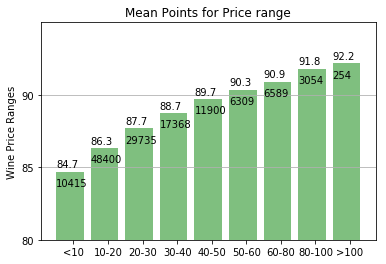

In [3]:
#Look at price categories of wines and get descriptive stats per range
#Categorize price into age groups by binning
bins=[0,10,20,30,40,50,60,80,100,500]
group_names=["<10", "10-20","20-30","30-40","40-50","50-60","60-80","80-100",">100"]

#Use non-duplicate purchasing data by players
df_limit["price_cat"] = pd.cut(df_limit["price"], bins, labels=group_names)
#Get counts of age groups
df_pr_grp=df_limit.groupby("price_cat")
df_pr_grp_mean=df_pr_grp["points"].mean()
df_pr_grp_ct=df_pr_grp["points"].count()
df_pr_grp_stats=pd.DataFrame(df_pr_grp_mean).merge(pd.DataFrame(df_pr_grp_ct), on="price_cat")\
    .rename(columns={"points_x":"mean", "points_y":"ct"}).reset_index()
df_pr_grp_stats["mean_lab"]=round(df_pr_grp_stats["mean"],1).astype(str)

#Create figure
fig, ax=plt.subplots()
x_axis=np.arange(1,len(df_pr_grp_stats)+1,1)
y_ticks=np.arange(80,95,5)
ax.set_ylim(80,95) 

plt.bar(x_axis, df_pr_grp_stats["mean"], color='g', alpha=0.5, align="edge", width=0.8)

for i, d in enumerate(df_pr_grp_stats["price_cat"]):
        ax.text(x_axis[i], df_pr_grp_stats["mean"][i] +.3, df_pr_grp_stats["mean_lab"][i] ,color='black')
        ax.text(x_axis[i], df_pr_grp_stats["mean"][i] -1, df_pr_grp_stats["ct"][i] ,color='black')
        
#Create tick marks and tick labels
ax.set_xticks(x_axis+0.5)
ax.set_xticklabels(df_pr_grp_stats["price_cat"])
ax.set_yticks(y_ticks)

#Create Title, axes labels and gridlines
plt.title("Mean Points for Price range")
plt.ylabel("Mean of Wine Points")  
plt.ylabel("Wine Price Ranges")  
plt.grid(which='major',axis="y")
         

In [ ]:
#Top 10 wines under $10 by variety and region
#Subset by price range
#low_lim=0
#up_lim=10
#df_lim=df_limit.loc[(df_limit['price'] >= low_lim) & (df_limit['price'] <= up_lim) ,:]

In [ ]:
#Which country produces best  
cny_t10=df_limit["country"].value_counts().head(10)




In [44]:
#Plot count per points
len(df_limit["points"].unique())

21

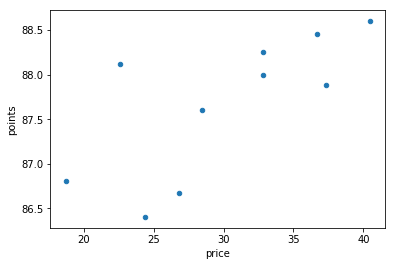

In [35]:
#Check mean for top 10 varieties and top 10 countries (by count of wines in the dataset)
var_t10=df_limit["variety"].value_counts().head(10)
cny_t10=df_limit["country"].value_counts().head(10)

#Subset for Top 10 varieties
df_var_t10=df_limit.loc[(True if x in list(var_t10.index) else False for x in df_limit["variety"]),:]

#Subset for Top 10 countries
df_cny_t10=df_var_t10.loc[(True if x in list(cny_t10.index) else False for x in df_var_t10["country"]),:]

var_pr_mn=df_cny_t10.groupby("variety")["price"].mean()
var_pt_mn=df_cny_t10.groupby("variety")["points"].mean()
df_var_stats=pd.DataFrame(var_pr_mn).merge(pd.DataFrame(var_pt_mn), on="variety").reset_index()

#plt.scatter(df_var_stats["price"], df_var_stats["points"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)
df_var_stats.plot.scatter("price","points")

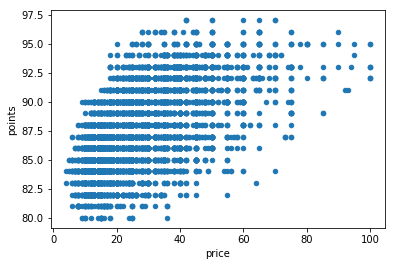

In [43]:
df_limit[(df_limit["country"]=="US") & (df_limit["variety"]=="Chardonnay")].plot.scatter("price","points")

In [ ]:
char_data_us=df_limit.loc[(df_limit['variety'] == "Chardonnay") & (df_limit['country'] == "US"),:]
#print(char_data.head(10))
for country in 
plt.scatter(char_data_us["price"], char_data_us["points"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)
char_data_us["price"].corr(char_data_us["points"])

In [ ]:
char_data[char_data["price"]<100.]["price"].plot(kind='hist',bins=100)

In [ ]:
char_data['price'].std()

In [ ]:
char_data_2 = char_data[char_data["price"]<(char_data['price'].std()*3.0)]["price"]

In [ ]:
char_data_2.plot(kind='hist',bins=100)